In [1]:
import os
import sys
import pandas
from bs4 import BeautifulSoup
import networkx as nx

In [2]:
G = nx.Graph()

c:\python39\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:109: RuntimeWarning: Glyph 30450 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
c:\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 30450 missing from current font.
  font.set_text(s, 0, flags=flags)


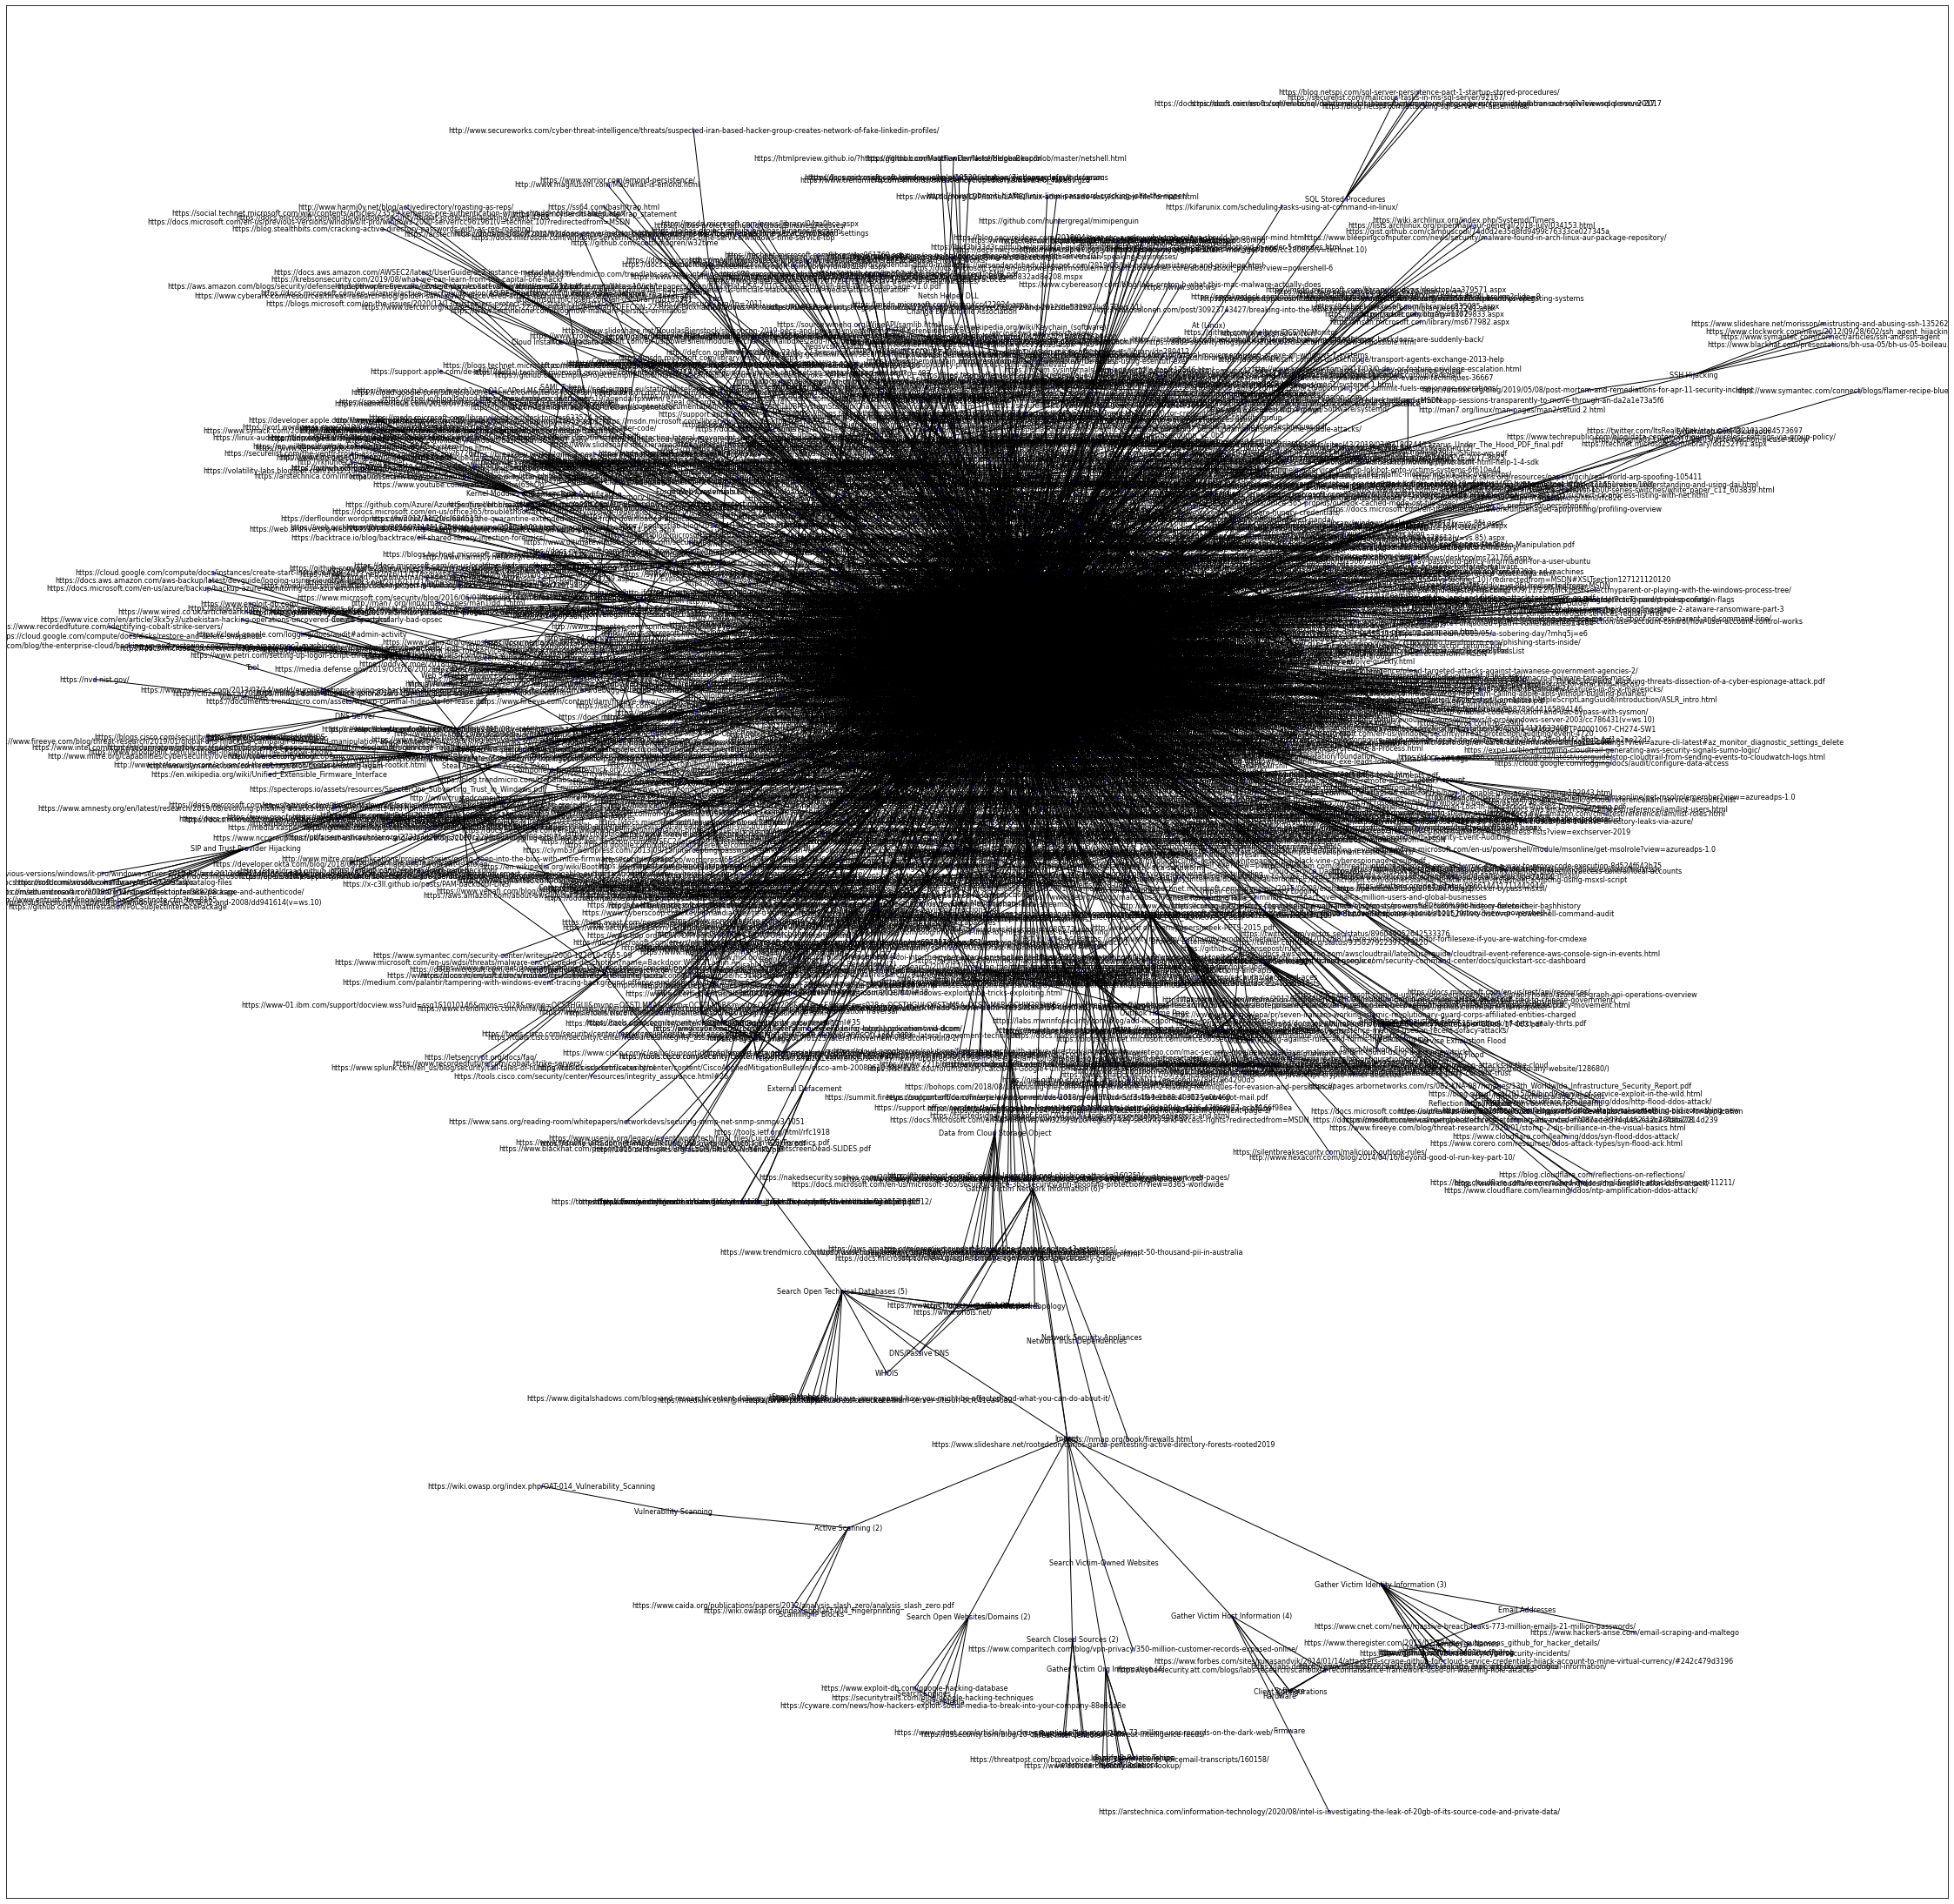

In [15]:
import matplotlib.pyplot as plt
# G =nx.random_graphs.barabasi_albert_graph(100,1)
# nx.draw(G)

plt.figure(figsize=(40,40))

graph_pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, graph_pos, node_size=10, node_color='blue', alpha=0.3)
nx.draw_networkx_edges(G, graph_pos)
nx.draw_networkx_labels(G, graph_pos, font_size=8, font_family='sans-serif')

# plt.show()
plt.savefig("plot.pdf")

In [10]:
plt.savefig("plot.pdf")

<Figure size 432x288 with 0 Axes>

In [13]:
# Save graph
nx.write_gml(G, "mitre_attack.gml")

In [3]:
# # Read graph
G = nx.read_gml('mitre_attack.gml')

In [19]:
soup = BeautifulSoup(open(r"C:\Users\DX\Desktop\MITRE ATT&CK.html"))

table = soup.find_all("table")[1]

In [6]:
table

<table class="matrix side">
<thead>
<tr>
<td class="tactic name"><a data-placement="top" data-toggle="tooltip" href="/tactics/TA0043" title="TA0043">Reconnaissance</a></td>
<td class="tactic name"><a data-placement="top" data-toggle="tooltip" href="/tactics/TA0042" title="TA0042">Resource Development</a></td>
<td class="tactic name"><a data-placement="top" data-toggle="tooltip" href="/tactics/TA0001" title="TA0001">Initial Access</a></td>
<td class="tactic name"><a data-placement="top" data-toggle="tooltip" href="/tactics/TA0002" title="TA0002">Execution</a></td>
<td class="tactic name"><a data-placement="top" data-toggle="tooltip" href="/tactics/TA0003" title="TA0003">Persistence</a></td>
<td class="tactic name"><a data-placement="top" data-toggle="tooltip" href="/tactics/TA0004" title="TA0004">Privilege Escalation</a></td>
<td class="tactic name"><a data-placement="top" data-toggle="tooltip" href="/tactics/TA0005" title="TA0005">Defense Evasion</a></td>
<td class="tactic name"><a dat

In [21]:
tactic_list = []

head = table.find("thead")
for head_content in head.find_all("a"):
    tactic_name = head_content.text
    tactic_list.append(tactic_name)
    tactic_url = head_content['href']
    print(tactic_url)
    
    G.add_node(tactic_name, url=tactic_url, types='tactic')

Reconnaissance
/tactics/TA0043
Resource Development
/tactics/TA0042
Initial Access
/tactics/TA0001
Execution
/tactics/TA0002
Persistence
/tactics/TA0003
Privilege Escalation
/tactics/TA0004
Defense Evasion
/tactics/TA0005
Credential Access
/tactics/TA0006
Discovery
/tactics/TA0007
Lateral Movement
/tactics/TA0008
Collection
/tactics/TA0009
Command and Control
/tactics/TA0011
Exfiltration
/tactics/TA0010
Impact
/tactics/TA0040


In [22]:
body = table.find("tbody")
tactic_count = -1

for body_content in body.find_all('table', {'class': 'techniques-table'}):
    tactic = tactic_list[tactic_count]
    tactic_count += 1
    print(tactic)
    
    print(len(body_content.find_all('table', {'class': 'supertechnique'})))
    
    for technique_row in body_content.find_all('tr', {'class': 'technique-row'}):
#         technique_list = []
        super_technique = technique_row.find_all('table', {'class': 'supertechnique'})
        is_super_technique = len(super_technique) # this value is zero when there is no sub-technique.
        print(is_super_technique) 
        if is_super_technique:
            super_technique_name = super_technique[0].find('a').text
            super_technique_url = super_technique[0].find('a')['href']
            print(super_technique_url)
            G.add_node(super_technique_name, url=super_technique_url, types='super_technique')
            G.add_edge(super_technique_name, tactic, type='belong to')
            
            for sub_technique in technique_row.find_all('div', {'class': 'subtechnique'}):
                sub_technique_name = sub_technique.find('a').text
                sub_technique_url = sub_technique.find('a')['href']
                print(sub_technique_url)
                G.add_node(sub_technique_name, url=sub_technique_url, types='sub_technique')
                G.add_edge(sub_technique_name, super_technique_name, types='belong to')
        else:
            technique_name = technique_row.find('a').text
            technique_url = technique_row.find('a')['href']
            print(technique_url)
            G.add_node(technique_name, url=technique_url, types='super_technique')
            G.add_edge(technique_name, tactic, types='belong to')

Impact
9
1
Active Scanning (2)
/techniques/T1595
Scanning IP Blocks
/techniques/T1595/001
Vulnerability Scanning
/techniques/T1595/002
1
Gather Victim Host Information (4)
/techniques/T1592
Hardware
/techniques/T1592/001
Software
/techniques/T1592/002
Firmware
/techniques/T1592/003
Client Configurations
/techniques/T1592/004
1
Gather Victim Identity Information (3)
/techniques/T1589
Credentials
/techniques/T1589/001
Email Addresses
/techniques/T1589/002
Employee Names
/techniques/T1589/003
1
Gather Victim Network Information (6)
/techniques/T1590
Domain Properties
/techniques/T1590/001
DNS
/techniques/T1590/002
Network Trust Dependencies
/techniques/T1590/003
Network Topology
/techniques/T1590/004
IP Addresses
/techniques/T1590/005
Network Security Appliances
/techniques/T1590/006
1
Gather Victim Org Information (4)
/techniques/T1591
Business Relationships
/techniques/T1591/002
Determine Physical Locations
/techniques/T1591/001
Identify Business Tempo
/techniques/T1591/003
Identify Rol

In [12]:
import requests

techniques_list = list(G.nodes())

for techniques in techniques_list:
#     print(G.nodes[techniques]['url'])
    if G.nodes[techniques]['url'].find('technique') != -1:
        technique_url = G.nodes[techniques]['url']
        print(technique_url)
        technique_html = requests.get('https://attack.mitre.org' + technique_url).text
        
        soup = BeautifulSoup(technique_html)
        for reference in soup.find_all('span', {'class': 'scite-citation'}):
            try:
                reference_name = reference.find('a').text
                reference_url = reference.find('a')['href']
            except:
                continue
            print(reference_url)
            G.add_node(reference_url, name=reference_name, types='reference')
            G.add_edge(reference_url, techniques, types='used')

/techniques/T1595
https://www.caida.org/publications/papers/2012/analysis_slash_zero/analysis_slash_zero.pdf
https://wiki.owasp.org/index.php/OAT-004_Fingerprinting
/techniques/T1595/001
https://www.caida.org/publications/papers/2012/analysis_slash_zero/analysis_slash_zero.pdf
/techniques/T1595/002
https://wiki.owasp.org/index.php/OAT-014_Vulnerability_Scanning
/techniques/T1592
https://cybersecurity.att.com/blogs/labs-research/scanbox-a-reconnaissance-framework-used-on-watering-hole-attacks
/techniques/T1592/001
https://cybersecurity.att.com/blogs/labs-research/scanbox-a-reconnaissance-framework-used-on-watering-hole-attacks
/techniques/T1592/002
https://cybersecurity.att.com/blogs/labs-research/scanbox-a-reconnaissance-framework-used-on-watering-hole-attacks
/techniques/T1592/003
https://arstechnica.com/information-technology/2020/08/intel-is-investigating-the-leak-of-20gb-of-its-source-code-and-private-data/
/techniques/T1592/004
https://cybersecurity.att.com/blogs/labs-research/sca

KeyError: 'url'

In [6]:
for techniques in G.nodes():
    print(G.nodes[techniques]['url'])

/tactics/TA0043
/tactics/TA0042
/tactics/TA0001
/tactics/TA0002
/tactics/TA0003
/tactics/TA0004
/tactics/TA0005
/tactics/TA0006
/tactics/TA0007
/tactics/TA0008
/tactics/TA0009
/tactics/TA0011
/tactics/TA0010
/tactics/TA0040
/techniques/T1595
/techniques/T1595/001
/techniques/T1595/002
/techniques/T1592
/techniques/T1592/001
/techniques/T1592/002
/techniques/T1592/003
/techniques/T1592/004
/techniques/T1589
/techniques/T1589/001
/techniques/T1589/002
/techniques/T1589/003
/techniques/T1590
/techniques/T1590/001
/techniques/T1071/004
/techniques/T1590/003
/techniques/T1590/004
/techniques/T1590/005
/techniques/T1590/006
/techniques/T1591
/techniques/T1591/002
/techniques/T1591/001
/techniques/T1591/003
/techniques/T1591/004
/techniques/T1598
/techniques/T1598/001
/techniques/T1566/001
/techniques/T1566/002
/techniques/T1597
/techniques/T1597/001
/techniques/T1597/002
/techniques/T1596
/techniques/T1596/002
/techniques/T1596/001
/techniques/T1588/004
/techniques/T1596/004
/techniques/T159